# Prediction of Monthly Amount Spent by a Customer

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load data into the pandas dataframe
amount_df = pd.read_csv('CE802_P3_Data.csv')

In [3]:
# view the first 5 rows of the data
amount_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56


In [4]:
# check the shape of the data
amount_df.shape

(1500, 17)

In [5]:
# check for more information 
amount_df.describe()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8.083320,8.109187,-185.816067,-224.532120,525.890600,63.602773,117.038520,3.947333,3.942667,6.490307,-15458.938340,-10.131380,-35.690000,1486.017107,922.082533
std,5.787817,5.812853,59.715228,87.920436,126.724179,774.154296,296.468097,1.836702,1.810036,6.080052,4443.035539,9.072751,12.549426,602.841367,1092.331874
min,0.080000,0.080000,-396.260000,-493.590000,-317.010000,0.000000,-947.190000,0.000000,0.000000,-13.640000,-35812.450000,-37.200000,-84.450000,-566.080000,0.000000
25%,3.890000,3.815000,-227.550000,-283.470000,465.892500,0.130000,-87.967500,3.000000,3.000000,2.580000,-17695.130000,-16.500000,-41.625000,1084.320000,0.000000
50%,6.830000,6.740000,-185.910000,-226.950000,525.705000,1.010000,119.865000,4.000000,4.000000,6.700000,-15459.995000,-10.140000,-35.745000,1478.850000,429.570000
75%,10.985000,10.945000,-145.720000,-166.440000,589.110000,6.805000,319.667500,5.000000,5.000000,10.450000,-13414.520000,-3.780000,-30.015000,1904.165000,1530.205000
max,46.780000,45.140000,51.620000,82.830000,1097.400000,27474.530000,1111.150000,11.000000,10.000000,25.900000,4302.780000,18.150000,47.160000,3587.780000,3960.010000


In [6]:
# check for missing values
amount_df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

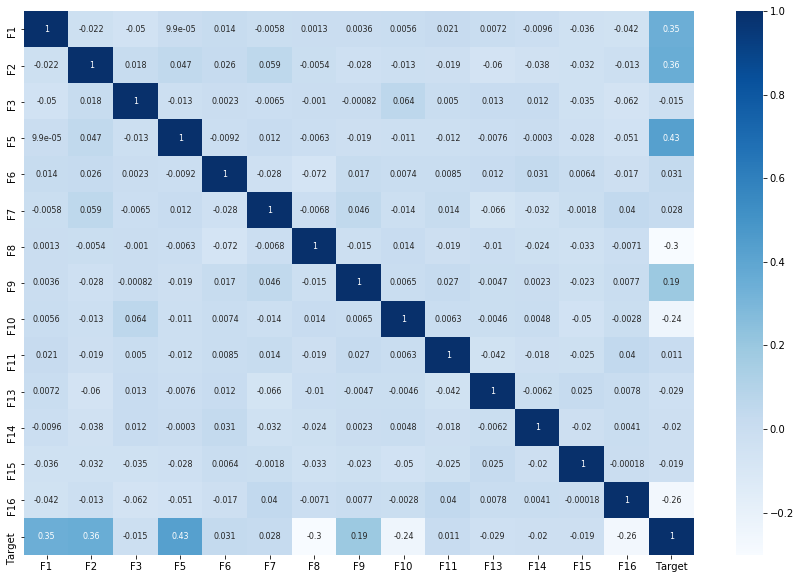

In [7]:
# create correlation plot using the heatmap 
corr_mx = amount_df.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(corr_mx, annot=True, annot_kws={'size':8}, cmap='Blues')

### Comment on observations
It can be observed that there exits weak correlations between the target feature and other features. Those with highest positive features include:
* F1
* F2
* F5
* F9

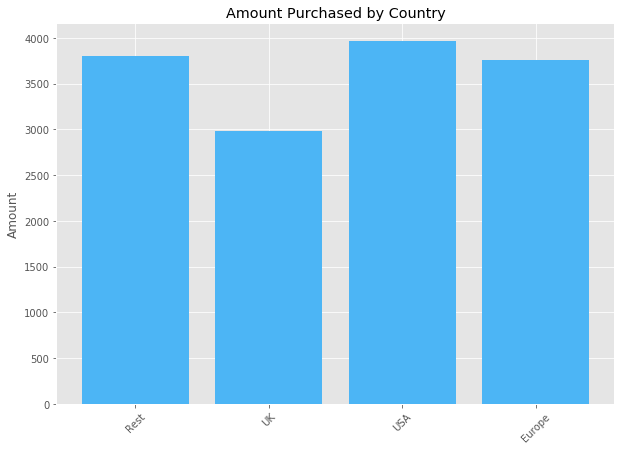

In [8]:
# create a plot for amount purchased per Country or region
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.bar(amount_df['F4'], amount_df['Target'], color= '#4CB5F5') 
plt.title('Amount Purchased by Country')
plt.ylabel('Amount')
plt.grid(True)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45)

### Comment on observations
It can be observed that the target variable (Amount) is influenced by the country or region. Hence it will be feature engineered  

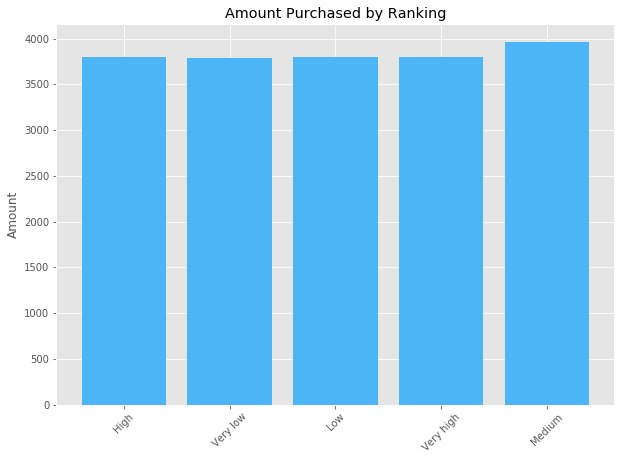

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.bar(amount_df['F12'], amount_df['Target'], color= '#4CB5F5') 
plt.title('Amount Purchased by Ranking')
plt.ylabel('Amount')
plt.grid(True)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45)

### Comment

* This column F12, may not be used for the modeling because it is almost independent on the target variable

In [10]:
# The data is being swamped with data with large absolute values. Hence, the need to scale. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the input data
input_data = amount_df[['F1','F2','F3','F5','F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F13', 'F14', 'F15', 'F16']].to_numpy()
data_scaled = scaler.fit_transform(input_data)
data_scaled_df = pd.DataFrame (data_scaled, columns = ['F1','F2','F3','F5','F6', 'F7', 'F8', 'F9', 'F10', 
                                                       'F11', 'F13', 'F14', 'F15', 'F16'])

In [11]:
data_scaled_df['F4'] = amount_df['F4'].values.tolist()

In [12]:
data_scaled_df.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4
0,0.352891,0.273857,0.357685,0.684761,0.598532,0.000165,0.644563,0.090909,0.1,0.529590,0.516676,0.438482,0.342147,0.553861,Rest
1,0.249251,0.274745,0.460391,0.753565,0.572762,0.000002,0.655854,0.454545,0.3,0.312595,0.499312,0.517615,0.371096,0.538964,Rest
2,0.091221,0.059032,0.435518,0.459925,0.622733,0.000044,0.531759,0.363636,0.4,0.554375,0.630345,0.497561,0.420561,0.488447,UK
3,0.271520,0.055482,0.254532,0.555689,0.603750,0.000009,0.515308,0.363636,0.3,0.503288,0.685159,0.324661,0.378847,0.331147,UK
4,0.235974,0.216156,0.342502,0.521235,0.660721,0.000333,0.627122,0.727273,0.6,0.170966,0.532923,0.501355,0.291087,0.481957,USA


In [13]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Country'. 
data_scaled_df['F4'] = label_encoder.fit_transform(data_scaled_df['F4']) 
                                                        
data_scaled_df.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4
0,0.352891,0.273857,0.357685,0.684761,0.598532,0.000165,0.644563,0.090909,0.1,0.529590,0.516676,0.438482,0.342147,0.553861,1
1,0.249251,0.274745,0.460391,0.753565,0.572762,0.000002,0.655854,0.454545,0.3,0.312595,0.499312,0.517615,0.371096,0.538964,1
2,0.091221,0.059032,0.435518,0.459925,0.622733,0.000044,0.531759,0.363636,0.4,0.554375,0.630345,0.497561,0.420561,0.488447,2
3,0.271520,0.055482,0.254532,0.555689,0.603750,0.000009,0.515308,0.363636,0.3,0.503288,0.685159,0.324661,0.378847,0.331147,2
4,0.235974,0.216156,0.342502,0.521235,0.660721,0.000333,0.627122,0.727273,0.6,0.170966,0.532923,0.501355,0.291087,0.481957,3


In [14]:
# Define the predicting and target feature
X = data_scaled_df
y = amount_df['Target']

In [15]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Development

### Linear Regression Model

In [16]:
# import the Linear model class
from sklearn.linear_model import LinearRegression

# fit to train model and predict with new dataset
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr= lr_model.predict(X_valid)

# import matrices
from sklearn import metrics
from sklearn.metrics import r2_score

# output performance results
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_lr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_lr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_lr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_lr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(lr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(lr_model.score(X_valid, y_valid)))

MAE: 482.89799374461654
MSE: 378257.0592247569
RMSE: 615.026063858075
R2_score: 0.6719015689750816
__________________________________________

Accuracy on train data: 0.6764917990622648
Accuracy on test data: 0.6719015689750816


Text(0.5, 1.0, 'Linear Regression Test R2 = 0.671902')

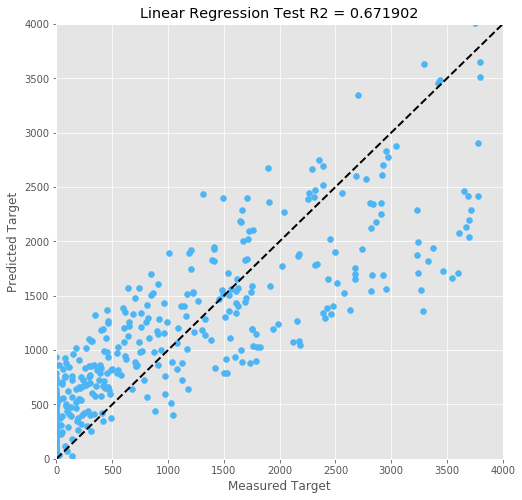

In [17]:
# output predicted values against measured values
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 4000, 00, 4000])
plt.scatter(y_valid, y_pred_lr, color='#4CB5F5')
plt.plot([0,4000],[0,4000],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted Target') # Predicted values on y axis
plt.xlabel('Measured Target') 
plt.title('Linear Regression Test R2 = %f'%(lr_model.score(X_valid, y_valid)))

### Decision Tree Regressor

In [18]:
# import the tree model class
from sklearn.tree import DecisionTreeRegressor

# fit to train model and predict with new dataset
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(X_train, y_train)
y_pred_dtr = dtr_model.predict(X_valid)


# output performance results
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_dtr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_dtr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_dtr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_dtr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(dtr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(dtr_model.score(X_valid, y_valid)))

MAE: 694.6939555555556
MSE: 1078202.9102777778
RMSE: 1038.3654993680104
R2_score: 0.06477176152728226
__________________________________________

Accuracy on train data: 1.0
Accuracy on test data: 0.06477176152728226


Text(0.5, 1.0, 'Decision Tree Regression Test R2 = 0.064772')

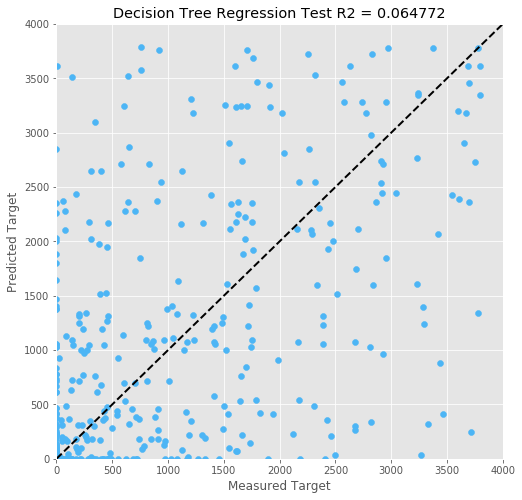

In [19]:
# output predicted values against measured values
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 4000, 00, 4000])
plt.scatter(y_valid, y_pred_dtr, color='#4CB5F5')
plt.plot([0,4000],[0,4000],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted Target') # Predicted values on y axis
plt.xlabel('Measured Target') 
plt.title('Decision Tree Regression Test R2 = %f'%(dtr_model.score(X_valid, y_valid)))

### K-Neighbors Regressor

In [20]:
# import the algorithm class
from sklearn.neighbors import KNeighborsRegressor

# fit to train model and predict with new dataset
knr_model = KNeighborsRegressor()
knr_model.fit(X_train, y_train)
y_pred_knr = knr_model.predict(X_valid)

# output performance results
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_knr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_knr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_knr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_knr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(knr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(knr_model.score(X_valid, y_valid)))

MAE: 474.4443422222223
MSE: 433924.2547734311
RMSE: 658.7292727467265
R2_score: 0.6236160999437558
__________________________________________

Accuracy on train data: 0.7546991200021373
Accuracy on test data: 0.6236160999437558


Text(0.5, 1.0, 'K-Neighbors Regression Test R2 = 0.623616')

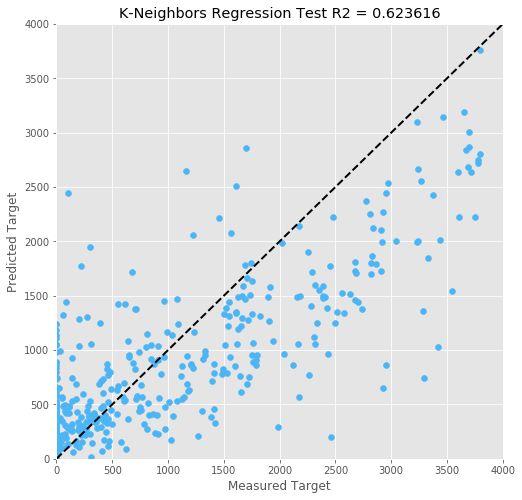

In [21]:
# output predicted values against measured values
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 4000, 00, 4000])
plt.scatter(y_valid, y_pred_knr, color='#4CB5F5')
plt.plot([0,4000],[0,4000],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted Target') 
plt.xlabel('Measured Target') 
plt.title('K-Neighbors Regression Test R2 = %f'%(knr_model.score(X_valid, y_valid)))

### Random Forest Regressor

In [22]:
# import the algorithm class
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor() 

# fit to train model and predict with new dataset
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_valid)

# output performance results
print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_rfr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rfr_model.score(X_valid, y_valid)))

MAE: 472.93061844444446
MSE: 402864.82766962
RMSE: 634.7163363815524
R2_score: 0.6505569039625332
__________________________________________

Accuracy on train data: 0.9515876668009093
Accuracy on test data: 0.6505569039625332


Text(0.5, 1.0, 'Random Forest Regressor Test R2 = 0.650557')

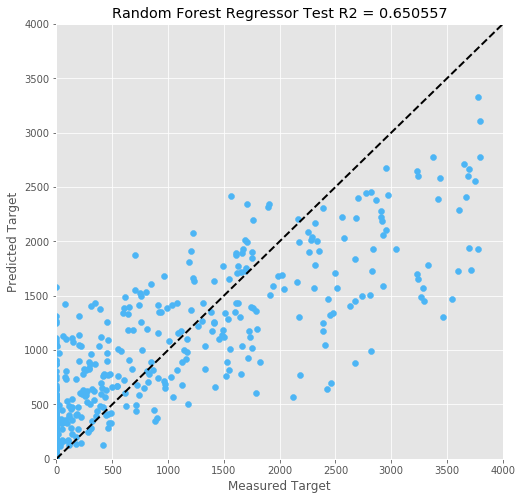

In [23]:
# output predicted values against measured values
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 4000, 00, 4000])
plt.scatter(y_valid, y_pred_rfr, color='#4CB5F5')
plt.plot([0,4000],[0,4000],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted Target') 
plt.xlabel('Measured Target') 
plt.title('Random Forest Regressor Test R2 = %f'%(rfr_model.score(X_valid, y_valid)))

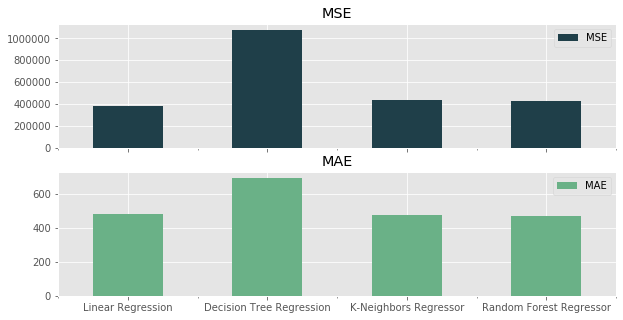

In [24]:
# create the percentage error plot
index = ['Linear Regression', 'Decision Tree Regression', 'K-Neighbors Regressor', 'Random Forest Regressor']
MSE = [378257.0592, 1078202.9103, 433924.2548, 423084.3631]
MAE = [482.8980,  694.6940, 474.4443, 473.0255]

score_df = pd.DataFrame({'MSE': MSE, 'MAE': MAE}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, figsize=(10, 5), subplots=True, color=['#1F3F49', '#6AB187'])

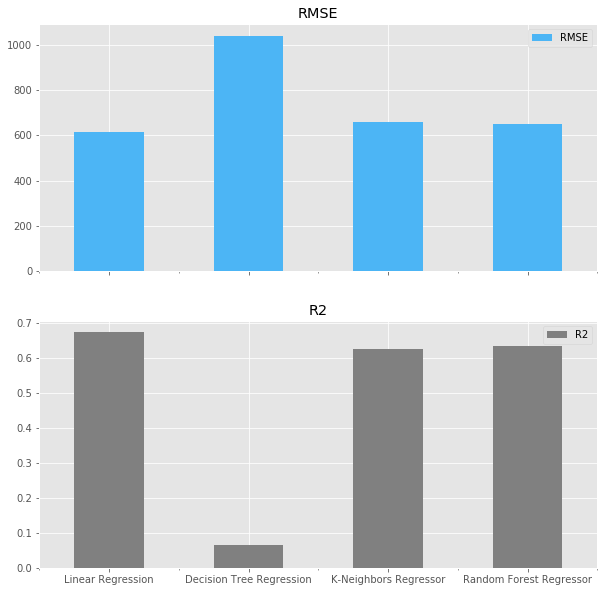

In [25]:
# create the percentage error plot
index = ['Linear Regression', 'Decision Tree Regression', 'K-Neighbors Regressor', 'Random Forest Regressor']
RMSE = [615.0261, 1038.3655, 658.7293, 650.4494]
R2 = [0.6719, 0.0648, 0.6236, 0.6330]

score_df = pd.DataFrame({'RMSE': RMSE, 'R2': R2}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, figsize=(10, 10), subplots=True, color=['#4CB5F5', '#808080'])

## Making Predictions for on the Test Dataset

In [26]:
#y_pred = lr_model.predict(X_test)

In [27]:
#test_data['Target'] = list(y_pred)

In [28]:
#test_data.head()

## Saving the CE802_P3_Test as CSV file

In [29]:
#test_data.to_csv('CE802_P3_Test.csv')

### The End !